In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
def plot_stock_price(df, company_name):
    plt.figure(figsize=(10, 5))
    plt.plot(df["Date"], df["Close"])
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.title(f"{company_name} Stock Price Over Time")
    plt.grid(True)
    plt.show()

In [3]:
tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period="max")

tesla_stock.reset_index(inplace=True)
tesla_stock.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
nvidia = yf.Ticker("NVDA")
nvidia_stock = nvidia.history(period="max")

nvidia_stock.reset_index(inplace=True)
nvidia_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00-05:00,0.040111,0.044767,0.035575,0.037605,2714688000,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.040589,0.042021,0.037605,0.041545,510480000,0.0,0.0
2,1999-01-26 00:00:00-05:00,0.042021,0.042857,0.037724,0.038321,343200000,0.0,0.0
3,1999-01-27 00:00:00-05:00,0.038440,0.039395,0.036291,0.038202,244368000,0.0,0.0
4,1999-01-28 00:00:00-05:00,0.038202,0.038440,0.037843,0.038082,227520000,0.0,0.0


In [5]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

table = soup.find("table", class_="historical_data_table")
rows = table.find_all("tr")

data = []
for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
tesla_revenue.head()

,Date,Revenue
0,2024,"$97,690"
1,2023,"$96,773"
2,2022,"$81,462"
3,2021,"$53,823"
4,2020,"$31,536"


In [6]:
url = "https://www.macrotrends.net/stocks/charts/NVDA/nvidia/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

table = soup.find("table", class_="historical_data_table")
rows = table.find_all("tr")

data = []
for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

nvidia_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
nvidia_revenue.head()


,Date,Revenue
0,2025,"$130,497"
1,2024,"$60,922"
2,2023,"$26,974"
3,2022,"$26,914"
4,2021,"$16,675"


In [7]:
def clean_revenue(df):
    df["Revenue"] = (
        df["Revenue"]
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
    )
    df["Revenue"] = pd.to_numeric(df["Revenue"])
    return df

tesla_revenue = clean_revenue(tesla_revenue)
nvidia_revenue = clean_revenue(nvidia_revenue)

tesla_revenue.head(), nvidia_revenue.head()


(   Date  Revenue
 0  2024    97690
 1  2023    96773
 2  2022    81462
 3  2021    53823
 4  2020    31536,
    Date  Revenue
 0  2025   130497
 1  2024    60922
 2  2023    26974
 3  2022    26914
 4  2021    16675)

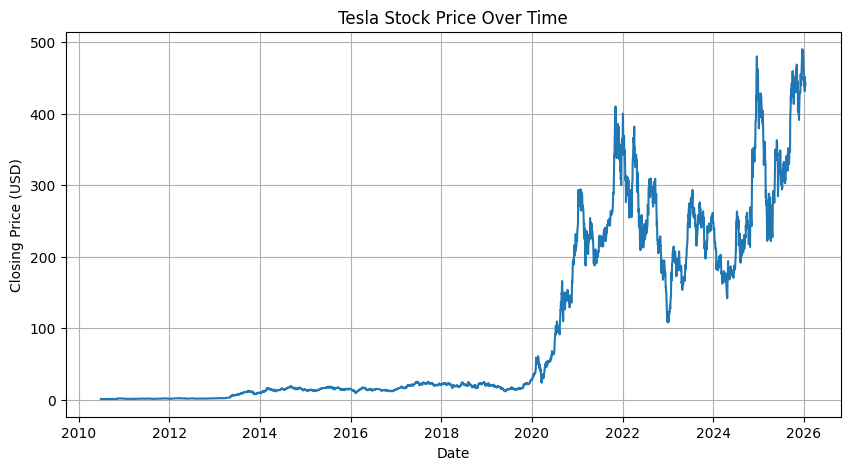

In [8]:
plot_stock_price(tesla_stock, "Tesla")

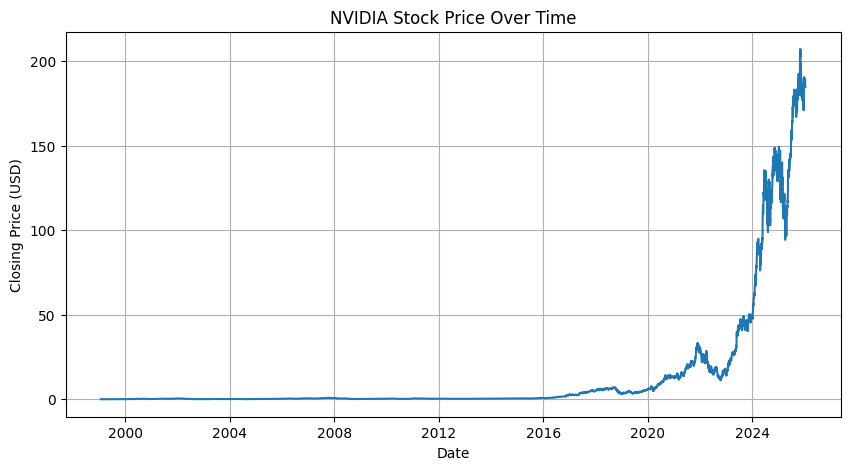

In [9]:
plot_stock_price(nvidia_stock, "NVIDIA")

In [10]:
def add_moving_averages(df):
    df = df.copy()
    df["MA_50"] = df["Close"].rolling(window=50).mean()
    df["MA_200"] = df["Close"].rolling(window=200).mean()
    return df

tesla_stock = add_moving_averages(tesla_stock)
nvidia_stock = add_moving_averages(nvidia_stock)

In [11]:

from ydata_profiling import ProfileReport


tesla_profile = ProfileReport(
    tesla_stock,
    title="Tesla Stock Data – Profiling Report",
    explorative=True
)

tesla_profile.to_file("tesla_stock_profile.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 262.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
nvidia_profile = ProfileReport(
    nvidia_stock,
    title="NVIDIA Stock Data – Profiling Report",
    explorative=True
)

nvidia_profile.to_file("nvidia_stock_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 170.06it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
tesla_revenue_profile = ProfileReport(
    tesla_revenue,
    title="Tesla Revenue Data – Profiling Report",
    explorative=True
)

tesla_revenue_profile.to_file("tesla_revenue_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
nvidia_revenue_profile = ProfileReport(
    nvidia_revenue,
    title="NVIDIA Revenue Data – Profiling Report",
    explorative=True
)

nvidia_revenue_profile.to_file("nvidia_revenue_stock_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<?, ?it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
def plot_with_moving_averages(df, company_name):
    plt.figure(figsize=(12, 6))
    plt.plot(df["Date"], df["Close"], label="Close Price")
    plt.plot(df["Date"], df["MA_50"], label="50-Day MA")
    plt.plot(df["Date"], df["MA_200"], label="200-Day MA")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.title(f"{company_name} Stock Price with Moving Averages")
    plt.legend()
    plt.grid(True)
    plt.show()

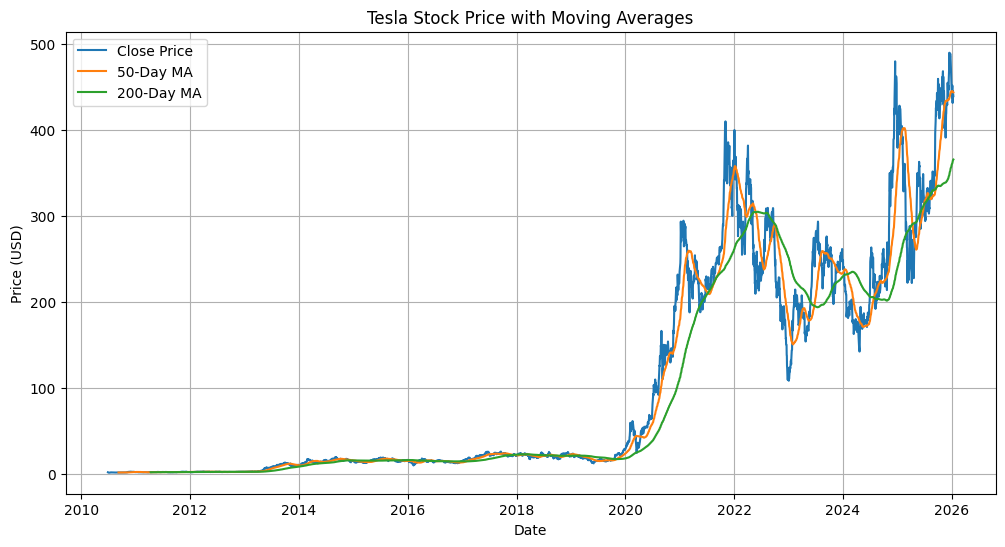

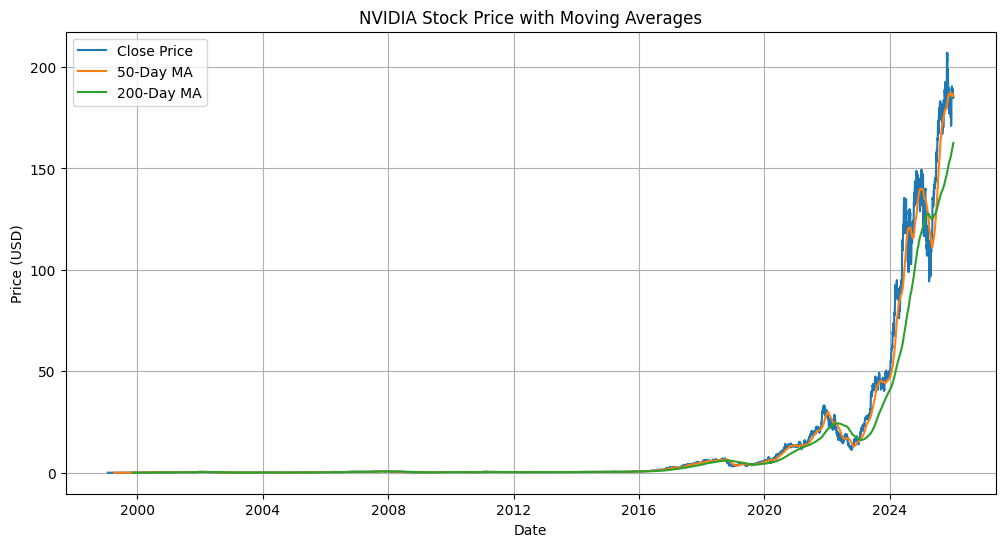

In [16]:
plot_with_moving_averages(tesla_stock, "Tesla")
plot_with_moving_averages(nvidia_stock, "NVIDIA")

In [17]:
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
nvidia_revenue["Date"] = pd.to_datetime(nvidia_revenue["Date"])

In [18]:
def plot_price_vs_revenue(stock_df, revenue_df, company_name):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(stock_df["Date"], stock_df["Close"])
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)")
    
    ax2 = ax1.twinx()
    ax2.plot(revenue_df["Date"], revenue_df["Revenue"])
    ax2.set_ylabel("Revenue (Million USD)")
    
    plt.title(f"{company_name}: Stock Price vs Revenue")
    fig.tight_layout()
    plt.grid(True)
    plt.show()

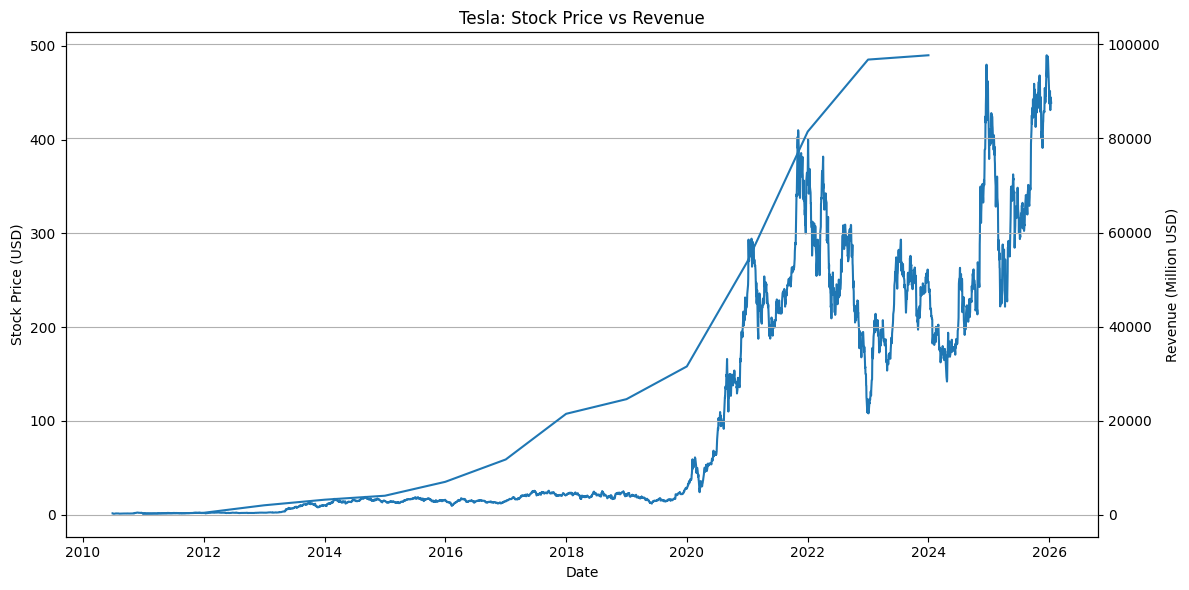

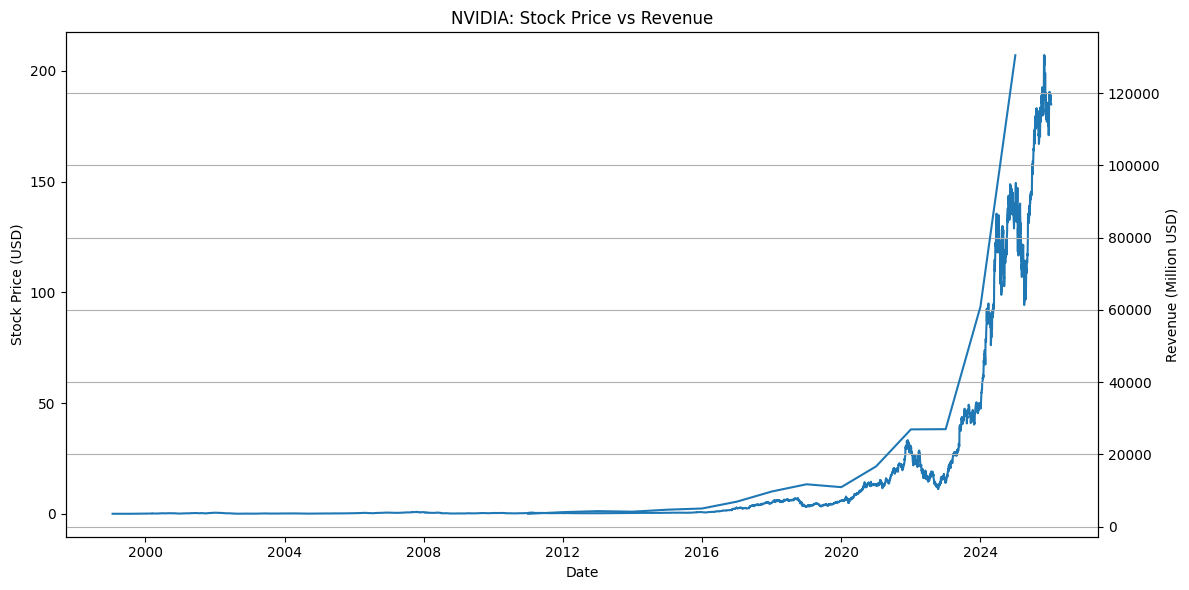

In [19]:
plot_price_vs_revenue(tesla_stock, tesla_revenue, "Tesla")
plot_price_vs_revenue(nvidia_stock, nvidia_revenue, "NVIDIA")

In [20]:
def normalize_prices(df):
    df = df.copy()
    df["Normalized_Close"] = df["Close"] / df["Close"].iloc[0] * 100
    return df

tesla_norm = normalize_prices(tesla_stock)
nvidia_norm = normalize_prices(nvidia_stock)

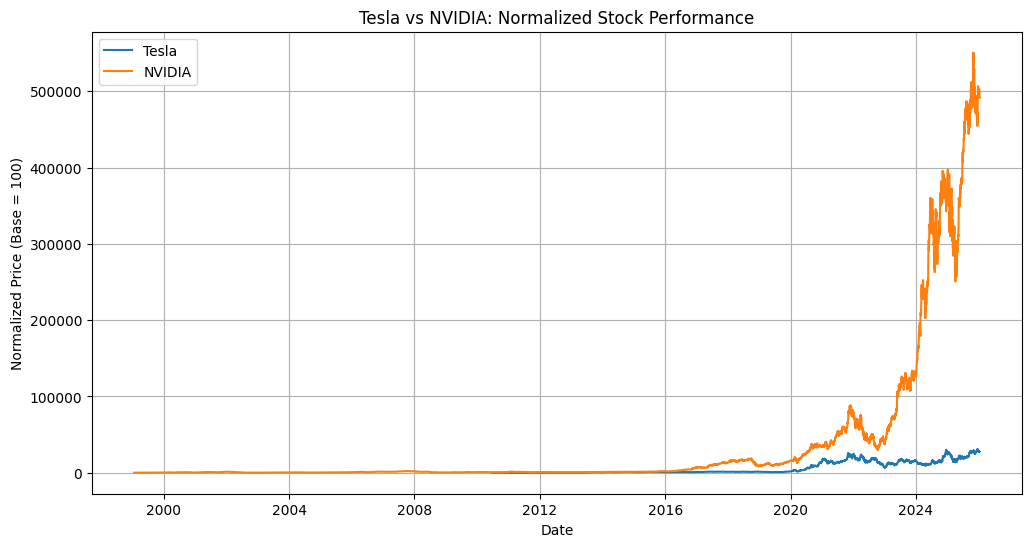

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(tesla_norm["Date"], tesla_norm["Normalized_Close"], label="Tesla")
plt.plot(nvidia_norm["Date"], nvidia_norm["Normalized_Close"], label="NVIDIA")
plt.xlabel("Date")
plt.ylabel("Normalized Price (Base = 100)")
plt.title("Tesla vs NVIDIA: Normalized Stock Performance")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
def add_daily_returns(df):
    df = df.copy()
    df["Daily_Return"] = df["Close"].pct_change()
    return df

tesla_stock = add_daily_returns(tesla_stock)
nvidia_stock = add_daily_returns(nvidia_stock)

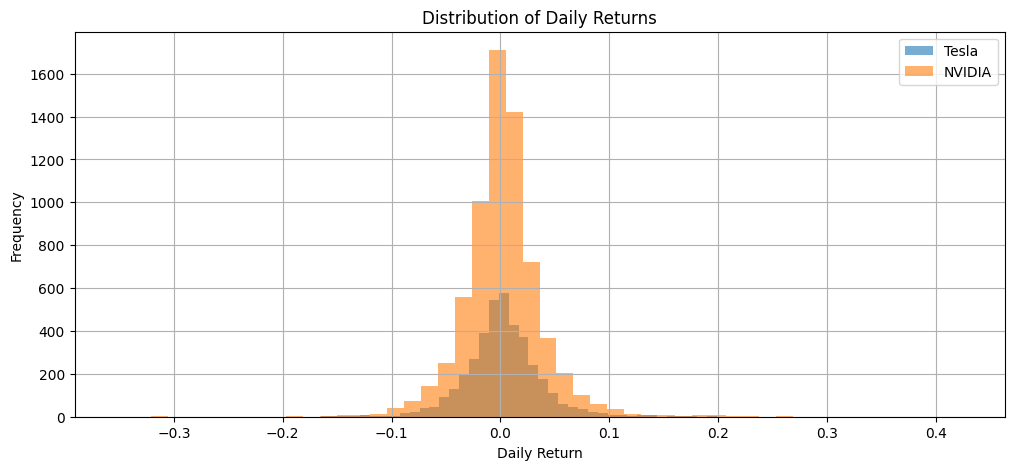

In [23]:
plt.figure(figsize=(12, 5))
plt.hist(tesla_stock["Daily_Return"].dropna(), bins=50, alpha=0.6, label="Tesla")
plt.hist(nvidia_stock["Daily_Return"].dropna(), bins=50, alpha=0.6, label="NVIDIA")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Returns")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
def add_rolling_volatility(df, window=30):
    df = df.copy()
    df["Volatility_30D"] = df["Daily_Return"].rolling(window).std()
    return df

tesla_stock = add_rolling_volatility(tesla_stock)
nvidia_stock = add_rolling_volatility(nvidia_stock)

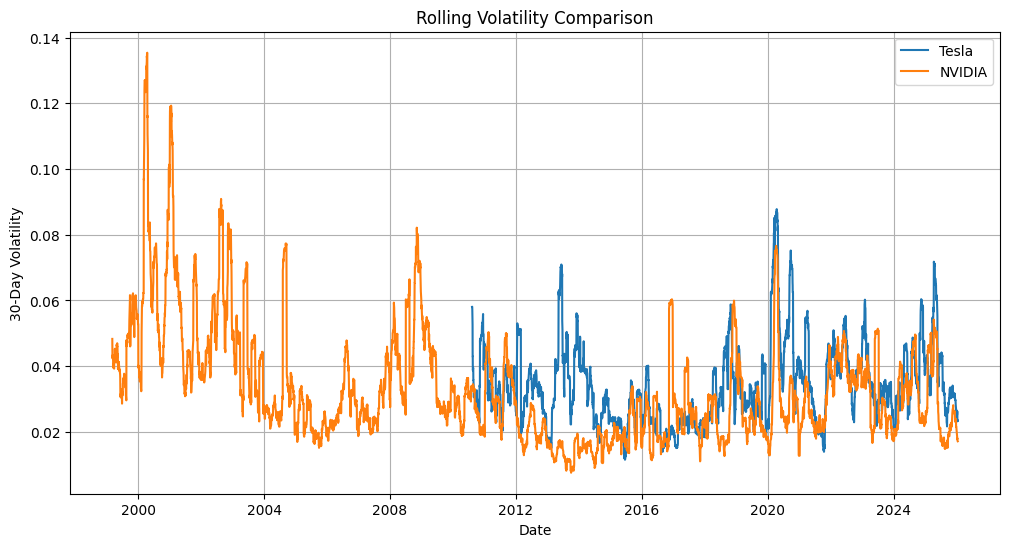

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(tesla_stock["Date"], tesla_stock["Volatility_30D"], label="Tesla")
plt.plot(nvidia_stock["Date"], nvidia_stock["Volatility_30D"], label="NVIDIA")
plt.xlabel("Date")
plt.ylabel("30-Day Volatility")
plt.title("Rolling Volatility Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
def prepare_revenue_growth(df):
    df = df.copy()
    df = df.sort_values("Date")
    df["YoY_Growth_%"] = df["Revenue"].pct_change() * 100
    return df

tesla_revenue = prepare_revenue_growth(tesla_revenue)
nvidia_revenue = prepare_revenue_growth(nvidia_revenue)

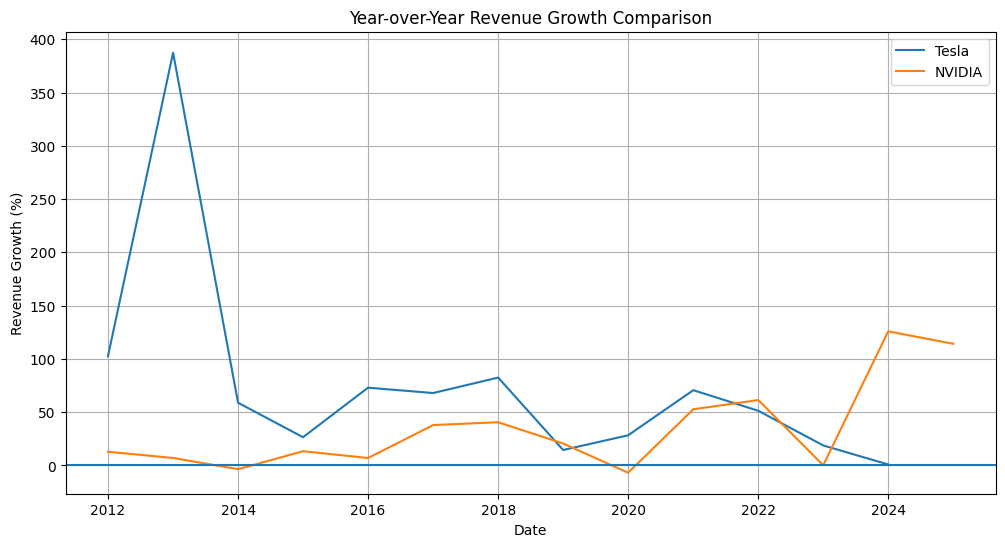

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(tesla_revenue["Date"], tesla_revenue["YoY_Growth_%"], label="Tesla")
plt.plot(nvidia_revenue["Date"], nvidia_revenue["YoY_Growth_%"], label="NVIDIA")
plt.axhline(0)
plt.xlabel("Date")
plt.ylabel("Revenue Growth (%)")
plt.title("Year-over-Year Revenue Growth Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
tesla_returns = tesla_stock["Daily_Return"].dropna()
nvidia_returns = nvidia_stock["Daily_Return"].dropna()

In [29]:
def calculate_sharpe_ratio(daily_returns, risk_free_rate=0):
    mean_return = daily_returns.mean()
    volatility = daily_returns.std()
    sharpe_ratio = (mean_return - risk_free_rate) / volatility
    annualized_sharpe = sharpe_ratio * (252 ** 0.5)
    return annualized_sharpe

In [30]:
tesla_sharpe = calculate_sharpe_ratio(tesla_returns)
nvidia_sharpe = calculate_sharpe_ratio(nvidia_returns)

print(tesla_sharpe)
print(nvidia_sharpe)

0.914776103244335
0.8259424673556033


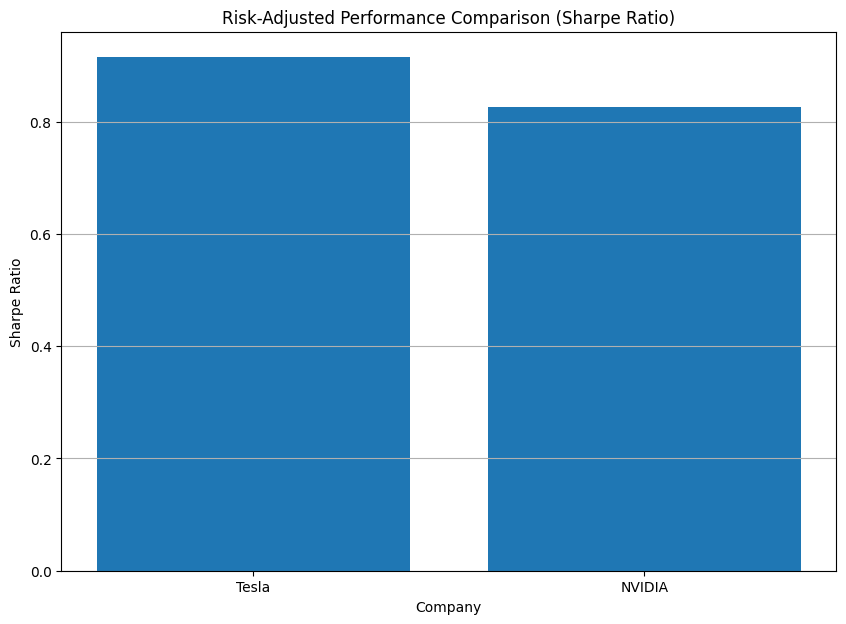

In [31]:
plt.figure(figsize=(10, 7))
companies = ["Tesla", "NVIDIA"]
sharpe_values = [tesla_sharpe, nvidia_sharpe]

plt.bar(companies, sharpe_values)
plt.xlabel("Company")
plt.ylabel("Sharpe Ratio")
plt.title("Risk-Adjusted Performance Comparison (Sharpe Ratio)")
plt.grid(True, axis="y")
plt.show()